 ## **1. Introduction**

### 1.1. Data Dictionary
* `PassengerId` : the unique id of the row and it doesn't have any effect on `Survived`.
* `Survived` : binary (**0** or **1**); 
    - **1** = **Survived**
    - **0** = **Not Survived**
* `Pclass` (Passenger Class) : the socio-economic status of the passenger. It is a categorical ordinal feature which has **3** unique values (**1**,  **2 **or **3**);
    - **1** = **Upper Class**
    - **2** = **Middle Class**
    - **3** = **Lower Class**
* `Name`, `Sex` and `Age` features are self-explanatory.
* `SibSp` : the total number of the passengers' siblings and spouse.
* `Parch` : the total number of the passengers' parents and children.
* `Ticket` : the ticket number of the passenger.
* `Fare` : the passenger fare.
* `Cabin` : the cabin number of the passenger.
* `Embarked` is port of embarkation. It is a categorical feature and it has **3** unique values (**C**, **Q** or **S**);
    - **C = Cherbourg**
    - **Q = Queenstown**
    - **S = Southampton**

### 1.2. Libarary

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import re
%matplotlib inline

### 1.3. Loading the Dataset

In [2]:
# Importing train dataset and test dataset
train_data = pd.read_csv("/Users/kenxu/Desktop/Statistical Learning/Project/input/train.csv")
test_data = pd.read_csv("/Users/kenxu/Desktop/Statistical Learning/Project/input/test.csv")

In [3]:
PassengerId=test_data['PassengerId']

There are 418 samples in test_data and 891 samples in the train_data. I merge the two data sets for missing value filling and feature engineering. Let's take a look at the merged dataset：

In [4]:
# Set the labels of test_data as na
test_data['Survived'] = np.nan

In [5]:
# Concat the features of train dataset and test dataset
all_data = pd.concat([train_data, test_data], ignore_index=True)

# Show the whole dataset informations
all_data.info()
display(all_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


/Users/kenxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


## **2. Missing Values**

Let's check how many null values in each feature:

In [6]:
# Check how many null values in each feature.
all_data.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

As shown above, there exists missing values in 5 features, We need to fill the missing values in different ways.

### **2.1. Age**

The age feature has 263 null values. Referring to [Fill missing values using Random Forest](https://www.mikulskibartosz.name/fill-missing-values-using-random-forest), I use a random forest regression model to simulate the value. The features we use here are sex, pclass, Parch, SibSp.

In [7]:
from sklearn.ensemble import RandomForestRegressor

age_df = all_data[['Age', 'Pclass','Sex','Parch','SibSp']]
age_df=pd.get_dummies(age_df)
known_age = age_df[age_df.Age.notnull()].as_matrix()
unknown_age = age_df[age_df.Age.isnull()].as_matrix()
y = known_age[:, 0]
X = known_age[:, 1:]
rfr = RandomForestRegressor(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X, y)
predictedAges = rfr.predict(unknown_age[:, 1::])
all_data.loc[(all_data.Age.isnull()), 'Age'] = predictedAges 

/Users/kenxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/Users/kenxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


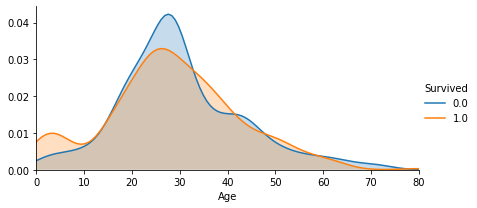

In [8]:
facet = sns.FacetGrid(all_data[0:890], hue="Survived",aspect=2)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, all_data.loc[0:890,'Age'].max()))
facet.add_legend()

The above figure is the distribution of age after filling in missing values.

### **2.2. Fare**

In [9]:
all_data[all_data['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


I fill the missing value in Fare with the median Fare of 3rd class alone passenger.

In [10]:
med_fare = all_data.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
all_data['Fare'] = all_data['Fare'].fillna(med_fare)

### **2.3. Embarked**

In [11]:
all_data[all_data['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


When I googled **Stone, Mrs. George Nelson (Martha Evelyn)**, I learned that **Mrs Stone** boarded the Titanic in **Southampton** on 10 April 1912 and was travelling in first class with her maid **Amelie Icard** in this page [Martha Evelyn Stone: Titanic Survivor](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html). So I can simply use 'S' to fill in missing values.

In [12]:
# Filling the missing values in Embarked with S
all_data['Embarked'] = all_data['Embarked'].fillna('S')

 ## **3. Feature Engineering**

### **3.1. Title Extraction**

Here I refer to a very interesting kernal for title extraction:[Titanic [EDA] + Model Pipeline + Keras NN](https://www.kaggle.com/kabure/titanic-eda-model-pipeline-keras-nn#5.-Preprocessing-:). Take a look at the Name column.

In [13]:
#Go over the name column
all_data["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Then I extract the prefix of all passengers.

In [14]:
#Extract the prefix of all Passengers
all_data['Title'] = all_data['Name'].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))

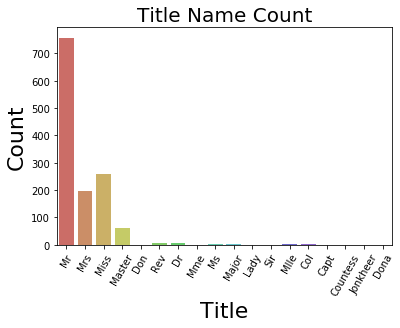

In [15]:
# Title countplot
sns.countplot(x='Title', data=all_data, palette="hls")
plt.xlabel("Title", fontsize=22)
plt.ylabel("Count", fontsize=22)
plt.title("Title Name Count", fontsize=20) 
plt.xticks(rotation=60)
plt.show()

In [16]:
# Make a dictionary for mapping the titles into three kinds
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Master",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty",
    "Dona" : "Royalty"    
}
    
# we map each title to correct category
all_data['Title'] = all_data.Title.map(Title_Dictionary)
all_data['Title'].value_counts()

Mr         757
Miss       262
Mrs        200
Master      62
Officer     23
Royalty      4
Name: Title, dtype: int64

### **3.2. Familyname**

For the processing of this feature, I refer to [Titanic using Name only [0.81818]](https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818). The author Chris Deotte bulids a simple model only with the name and sex column and scores 82% accuracy. 
![model](http://playagricola.com/Kaggle/tree4.jpg)
He found that the male except boy is dead and the female except surname family dead are survived.

Thus I gonna make the exception list of male and female. Then change the features of test surname in the list into the dead features or survived features according to the list.

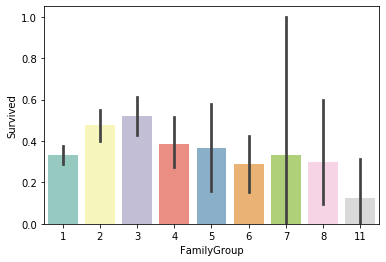

In [17]:
# Extract from name feature
all_data['Familyname'] = all_data['Name'].map(lambda name:name.split(',')[0].strip())

# Create a new feature as Familyname frequency
all_data['FamilyGroup'] = all_data['Familyname'].map(all_data['Familyname'].value_counts()) 

sns.barplot(x='FamilyGroup', y='Survived', data=all_data, palette='Set3')

The Dead List of Female_Child_Group(16 years old or younger, female) :

In [18]:
Female_Child_Group=all_data.loc[(all_data['FamilyGroup']>=2) & ((all_data['Age']<=16) | (all_data['Sex']=='female'))]
Female_Child_Group=Female_Child_Group.groupby('Familyname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
print(Dead_List)

{'Danbom', 'Skoog', 'Palsson', 'Caram', 'Oreskovic', 'Elias', 'Lahtinen', 'Rice', 'Lefebre', 'Robins', 'Arnold-Franchi', 'Ilmakangas', 'Attalah', 'Canavan', 'Turpin', 'Barbara', 'Van Impe', 'Panula', 'Zabour', 'Jussila', 'Johnston', 'Ford', 'Cacic', 'Vander Planke', 'Sage', 'Lobb', 'Olsson', 'Goodwin', 'Rosblom', 'Bourke', 'Strom', 'Boulos'}


The Survived List of Female_Child_Group(Over 16 years old, male) :

In [19]:
Male_Adult_Group=all_data.loc[(all_data['FamilyGroup']>=2) & (all_data['Age']>16) & (all_data['Sex']=='male')]
Male_Adult_List=Male_Adult_Group.groupby('Familyname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
print(Survived_List)

{'Daly', 'Duff Gordon', 'Frauenthal', 'Goldenberg', 'Harder', 'Kimball', 'Cardeza', 'Taylor', 'Beckwith', 'Nakid', 'McCoy', 'Beane', 'Dick', 'Jonsson', 'Jussila', 'Chambers', 'Frolicher-Stehli', 'Bradley', 'Bishop', 'Moubarek', 'Greenfield'}


In [20]:
all_data.loc[(all_data['Survived'].isnull()) & (all_data['Familyname'].apply(lambda x:x in Dead_List)),\
              ['Sex','Age','Title']] = ['male',28.0,'Mr']
all_data.loc[(all_data['Survived'].isnull()) & (all_data['Familyname'].apply(lambda x:x in Survived_List)),\
              ['Sex','Age','Title']] = ['female',5.0,'Miss']

### **3.3. Family size**

The kernal [Titanic [EDA] + Model Pipeline + Keras NN](https://www.kaggle.com/kabure/titanic-eda-model-pipeline-keras-nn#5.-Preprocessing-:) also provide a good idea about the familysize.

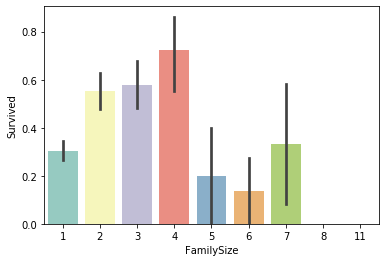

In [21]:
all_data['FamilySize']=all_data['SibSp']+all_data['Parch']+1
sns.barplot(x="FamilySize", y="Survived", data=all_data, palette='Set3')

We can see that the families with size 2 to 4 have relatively higher survival rate, so we can label the family size with 3 different type.

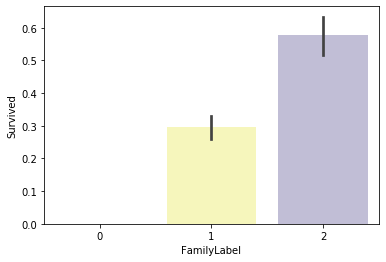

In [22]:
def Fam_label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 7)) | (s == 1):
        return 1
    elif (s > 7):
        return 0
all_data['FamilyLabel']=all_data['FamilySize'].apply(Fam_label)
sns.barplot(x="FamilyLabel", y="Survived", data=all_data, palette='Set3')

### **3.4. Cabin and Deck**

There are many null values in 'Cabin' features. For the better predictions, it is believed to delete the feature of 'Cabin'. But here we need this feature because when the ship sinks, certain parts of the ship have different probability drown in water. So we deal to make a new feature to substitute the feature.

Here I refer to another kernal's engineering on `cabin`([Titanic: Tutorial, Encoding, Feature Eng, 81.8% ](https://www.kaggle.com/volhaleusha/titanic-tutorial-encoding-feature-eng-81-8)) and simplified the code.

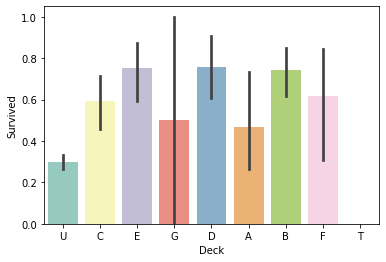

In [23]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
all_data['Deck']=all_data['Cabin'].str.get(0)
sns.barplot(x="Deck", y="Survived", data=all_data, palette='Set3')

### **3.5. Ticket Group**

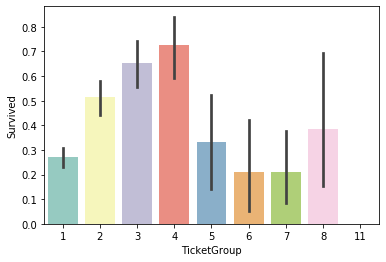

In [24]:
Ticket_Count = dict(all_data['Ticket'].value_counts())

all_data['TicketGroup'] = all_data['Ticket'].map(Ticket_Count)
sns.barplot(x='TicketGroup', y='Survived', data=all_data, palette='Set3')

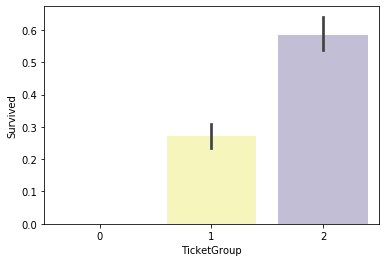

In [25]:
def Ticket_Label(s):
    if (s >= 2) & (s <= 4):
        return 2
    elif ((s > 4) & (s <= 8)) | (s == 1):
        return 1
    elif (s > 8):
        return 0

all_data['TicketGroup'] = all_data['TicketGroup'].apply(Ticket_Label)
sns.barplot(x='TicketGroup', y='Survived', data=all_data, palette='Set3')

In [26]:
all_data = all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data.isnull().sum()

Survived       418
Pclass           0
Sex              0
Age              0
Fare             0
Embarked         0
Title            1
FamilyLabel      0
Deck             0
TicketGroup      0
dtype: int64

 ## **4. Modeling**

In [27]:
all_data = all_data[['Survived','Pclass','Sex','Age','Fare','Embarked','Title','FamilyLabel','Deck','TicketGroup']]
all_data = pd.get_dummies(all_data)
train = all_data[all_data['Survived'].notnull()]
test = all_data[all_data['Survived'].isnull()].drop('Survived',axis=1)

In [28]:
train.head()

,Survived,Pclass,Age,Fare,FamilyLabel,TicketGroup,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Title_Royalty,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U
0,0.0,3,22.0,7.2500,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1,38.0,71.2833,2,2,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,3,26.0,7.9250,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1.0,1,35.0,53.1000,2,2,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.0,3,35.0,8.0500,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
train.shape

(891, 26)

 ### **4.1. Random Forest**

In [30]:
features = train.columns[1:]

In [31]:
features

Index(['Pclass', 'Age', 'Fare', 'FamilyLabel', 'TicketGroup', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer', 'Title_Royalty',
       'Deck_A', 'Deck_B', 'Deck_C', 'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G',
       'Deck_T', 'Deck_U'],
      dtype='object')

In [32]:
X = train[features]
y = train['Survived']

In [33]:
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')

pipeline = make_pipeline(select, clf)
pipeline.fit(X, y)

cv_result = cross_validate(clf, X, y, cv= 10)
print("CV Test Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_result['test_score']), \
                                                     np.std(cv_result['test_score'])))

CV Test Score : Mean - 0.840658 | Std - 0.03530699 


In [34]:
test_x = test.as_matrix()

/Users/kenxu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [35]:
predictions = pipeline.predict(test_x)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("RF_submission_test.csv", index=False)

> ### **Model interpretation**

Text(0.5, 0, 'Relative Importance')

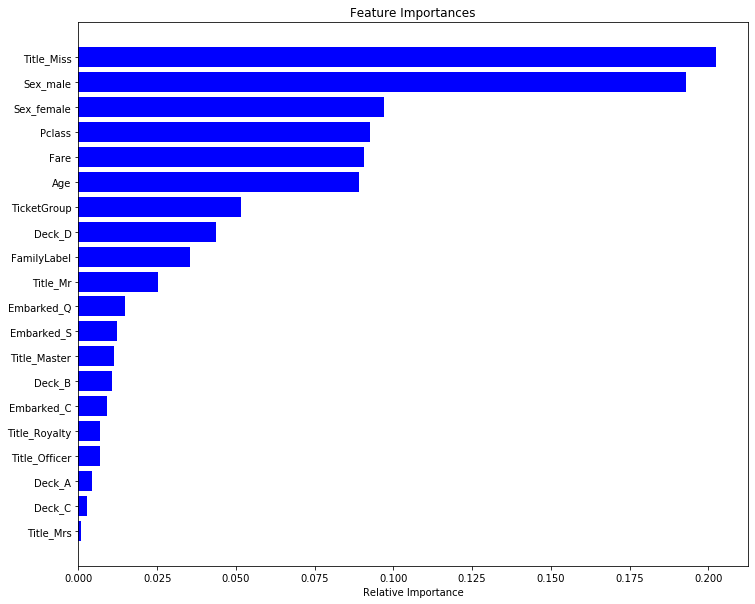

In [36]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [37]:
# X_train = train.iloc[:,1:]

In [38]:
# cols = select.get_support(indices=True)
# cols

In [39]:
# len(clf.estimators_)
# X_train_new = X_train.iloc[:,cols]
# X_train_new.columns

In [40]:
# from sklearn.tree import export_graphviz
# from IPython.display import SVG
# from graphviz import Source
# graph = Source(export_graphviz(clf.estimators_[2],
#                 feature_names=X_train_new.columns,
#                 filled=True,
#                 rounded=True))
# SVG(graph.pipe(format='svg'))

 ### **4.2. XGBoost**

In [41]:
from sklearn.feature_selection import SelectKBest
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_validate
import warnings
warnings.filterwarnings('ignore')

select = SelectKBest(k = 20)
clf_XGB = XGBClassifier(
                     max_depth=3, 
                     learning_rate=0.1, 
                     n_estimators=100, 
                     silent=True, 
                     objective='binary:logistic', 
                     booster='gbtree', 
                     nthread=None, 
                     gamma=0, 
                     subsample=0.8, 
                     colsample_bytree=1, 
                     colsample_bylevel=1, 
                     reg_alpha=0, 
                     reg_lambda=1, 
                     scale_pos_weight=1.2, 
                     base_score=0.5)

pipeline = make_pipeline(select, clf_XGB)
model_XGB = pipeline.fit(X, y)

cv_result = cross_validate(clf_XGB, X, y, cv= 10)

print(cv_result['test_score'])
print("CV Test Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_result['test_score']), \
                                                     np.std(cv_result['test_score'])))

[0.83333333 0.86666667 0.76404494 0.86516854 0.8988764  0.86516854
 0.83146067 0.79775281 0.85393258 0.85227273]
CV Test Score : Mean - 0.8428677 | Std - 0.03657637 


In [42]:
predictions = pipeline.predict(test_x)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("XGB_submission_test.csv", index=False)

In [43]:
importances_XGB = clf_XGB.feature_importances_
indices_XGB = np.argsort(importances_XGB)

Text(0.5, 0, 'Relative Importance')

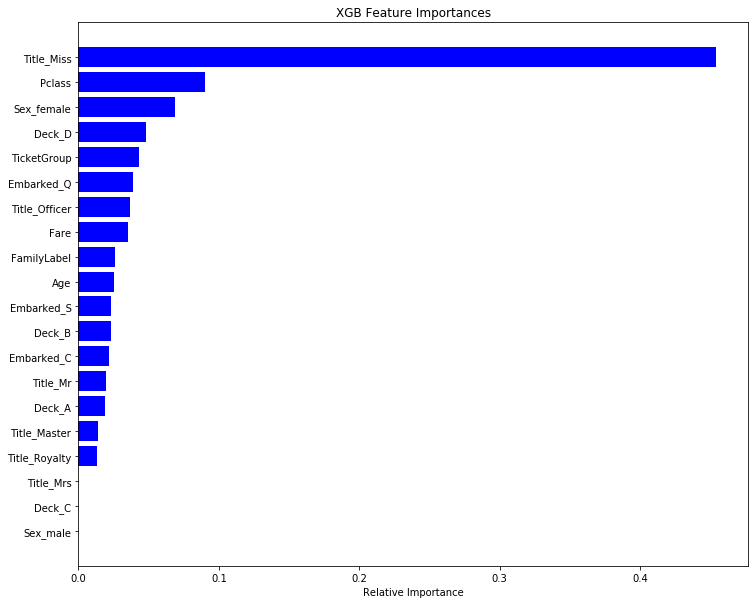

In [44]:
plt.figure(figsize=(12,10))
plt.title('XGB Feature Importances')
plt.barh(range(len(indices_XGB)), importances_XGB[indices_XGB], color='b', align='center')
plt.yticks(range(len(indices_XGB)), features[indices_XGB])
plt.xlabel('Relative Importance')